# **Project 3 Regression:** UCI Air Quality Dataset

#### Emily Santacruz Garcia

Before analyzing the data, we need to install the necessary libraries for this project: 
- Pandas (dataframes)
- Matplotlib (Visualizations)
- Seaborn (Visualizations)
- Scikit-learn (Data partition, Regression, accuracy)
- Statsmodel (Regression)

In [4]:
# ! pip install pandas numpy matplotlib scikit-learn statsmodels seaborn

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import os
import warnings
from sklearn import linear_model

# **Introduction to the Problem**
The primary focus of this project is to determine how accurately air pollutant concentrations (such as CO, NO2, and benzene) can be predicted using meteorological factors (temperature, humidity) and sensor readings. Additionally, we will explore other influencing factors, including:


In [7]:
# Read data into a dataframe

AirQuality = pd.read_csv('AirQualityUCI.csv')
AirQuality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [8]:
AirQuality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The main focus of Project 3 regression is analyzing the air quality measurements dataset. It is widely recognized that air pollution is on the rise and continues to be one of the world’s largest health and environmental problems. Air pollution can be categorized into two contexts: indoor (household) and outdoor. It is responsible for millions of deaths each year, especially in low-income countries, second only to high blood pressure in terms of leading causes of death, according to data and visualization provided by the Institute for Health Metrics and Evaluation (IHME), Global Burden of Disease (2024). 

The high mortality rate due to air pollution is linked to risk factors for heart disease, stroke, lower respiratory infections, lung cancer, diabetes, and chronic obstructive pulmonary disease (COPD). This project aims to focus specifically on the environmental aspect of air quality rather than on the illnesses it causes, though understanding its detrimental effects is important. 

Moreover, there have been changes and even a decline in indoor air pollution since 1990; however, outdoor pollution continues to rise, with leading causes of death shifting between 2011-2012, as reported by the IHME, Global Burden of Disease (2024). With this context in mind, we will specifically focus on outdoor pollution in the fields of environmental science and public health. Our central research question will be: **“How effectively can air pollutant concentrations (CO, NO2, and benzene) be predicted using meteorological factors (temperature, humidity), sensor readings, and time-based trends, by leveraging multiple regression models including Linear Regression, Random Forest Regression, and Lasso Regression?"**

To achieve this objective, we will conduct an investigation using multiple regression models to examine the relationships between these pollutants and environmental conditions, which will be crucial for analyzing air quality monitoring and forecasting. The questions provided here: 

- **Which regression model (Linear Regression, Random Forest Regression, Lasso Regression) demonstrates the highest accuracy in predicting air pollutant concentrations, and what factors contribute to its effectiveness?**

- **Among meteorological variables (temperature, humidity), sensor readings, and time-based trends, which features hold the most predictive power for estimating pollutant levels (CO, NO2, and benzene)?**

- **In what ways do varying meteorological conditions (such as high humidity and low wind speeds) influence peak levels of air pollutants?**

- **How do different regression models compare in predictive performance when trained on datasets of varying sizes?**

- **What impact do dataset size and feature selection have on balancing the trade-off between overfitting and underfitting in regression modeling?**

The dataset we will use is the "UCI Air Quality Dataset," provided on Kaggle by Daksh Bhalala. It has been cleaned and includes recent data, making it suitable for researchers monitoring urban air quality. The dataset contains extensive air quality measurements collected over several months, focusing on various pollutants and their concentrations over time. It provides valuable insights for predictive modeling and data analysis in environmental science and public health, particularly for machine-learning applications. The dataset is a cleaned version that draws inspiration from other datasets, such as the “UCI Air Quality EDA” by Berker Topuz and “notebookcd678447d7” by Shawn Foster, all of which can be found on Kaggle and served as references for the analysis conducted in this project. 

The dataset consists of sixteen columns and a total of 951 records, with ten attributes related to air measurement. However, data cleaning is necessary to address missing values, as some measurements are recorded as -200, indicating missing or invalid data points. Although the dataset is relatively clean, it will be revisited for further analysis.

The variables and their meanings will be provided below before the experiment, allowing for a clearer understanding of the features used and their significance to the model:


# **Introduction to Data**

**Date:** The date of the measurement.

**Time:** The time of the measurement.

**CO(GT):** Concentration of carbon monoxide (CO) in the air (µg/m³).

**PT08.S1(CO):** Sensor measurement for CO concentration.

**NMHC(GT):** Concentration of non-methane hydrocarbons (NMHC) (µg/m³).

**C6H6(GT):** Concentration of benzene (C6H6) in the air (µg/m³).

**PT08.S2(NMHC):** Sensor measurement for NMHC concentration.

**NOx(GT):** Concentration of nitrogen oxides (NOx) in the air (µg/m³).

**PT08.S3(NOx):** Sensor measurement for NOx concentration.

**NO2(GT):** Concentration of nitrogen dioxide (NO2) in the air (µg/m³).

**The following features will be excluded as they are not directly related to air quality measurements:**

**PT08.S4(NO2):** Sensor 4 output from the TGS gas sensor, which is sensitive to nitrogen dioxide (NO2).

**PT08.S5(O3):** Sensor 5 output from the TGS gas sensor, which is sensitive to ozone (O3).

**T:** Temperature (°C).

**RH:** Relative Humidity (%)

**AH:** Absolute Humidity (g/m³).

https://www.kaggle.com/datasets/dakshbhalala/uci-air-quality-dataset/data

# **What is regression and how does it work?**

**Regression** is a statistical method commonly used in finance, investing, and various other fields to analyze the relationship between a dependent variable and one or more independent variables. This method helps to determine the strength and direction of the relationship using several evaluation metrics. Three key metrics are the mean absolute error (MAE), mean squared error (MSE), and R² score. When fitting a regression line to a dataset, the MAE measures the average absolute distance between the data points and the regression line. However, a drawback of MAE is that it is not differentiable. The MSE addresses this limitation by squaring the distances before averaging them, making it differentiable and more sensitive to larger errors. On the other hand, the R² score compares the error of the regression model to that of a simple average model, which assumes a horizontal line through the data points. It is calculated using the formula: R² = 1 - (Error from Linear Regression Model / Error from Simple Average Model). An R² score of 1.0 indicates a perfect fit, while negative values imply that the model performs worse than a basic average-based approach. Additional regression methods, each with distinct strengths and applications, will be discussed further.

**Linear regression** is a statistical method commonly used in machine learning models to predict unknown data values based on related data. It examines the relationship between a dependent variable and one or more independent variables. This method is widely utilized in predictive modeling. For example, linear regression can be used to analyze the impact of study hours on exam scores. In a simple linear regression scenario, we collect data from multiple students, recording their study hours (the independent variable, X) and their exam scores (the dependent variable, Y). The goal is to identify a mathematical relationship between these two variables, allowing us to understand how study time influences performance and to make predictions based on that understanding.

**Random Forest Regression** combines the predictions from multiple decision trees to produce a more accurate outcome. It is a supervised learning algorithm used for both classification and regression analysis. This method predicts numerical values by averaging the results of several decision trees. The process begins with bootstrap sampling, where random rows of data are selected with replacement to create different training datasets for each tree. Next, feature sampling is conducted, ensuring that only a random subset of features is used to build each tree. This ensures diversity among the models. Once all the trees are trained, they make predictions, and the final prediction for regression tasks is calculated as the average of all the individual tree predictions, a process known as aggregation. This helps to prevent high variance and overfitting of the data.In this project, the service will utilize bootstrapping from a dataset related to air quality. It will build a decision tree for each sample by splitting the data based on minimizing the mean squared error (MSE), calculated using the formula: MSE = m1 * ∑(Yi - Ȳ)², where Yi represents the actual values and Ȳ is the mean. By selecting a random subset of data to prevent overfitting, it will average all tree predictions to arrive at the final prediction. The performance will be evaluated using Mean Squared Error (MSE) or the R² score to assess accuracy.

**Lasso Regression** is a type of regression model that incorporates a penalty term to simplify the model by reducing the influence of less important independent variables. This helps prevent overfitting and makes weaker features more identifiable by shrinking their coefficients toward zero. Lasso regression is particularly useful when working with Ordinary Least Squares (OLS) regression, which aims to minimize the sum of squared differences: min 𝑅𝑆𝑆 = ∑ ( 𝑦𝑖 − 𝑦 ^ 𝑖) 2 where 𝑦𝑖  is the observed value, and 𝑦^𝑖 is the predicted value for each data point. However, Lasso regression adds a penalty term that minimizes both the residual sum of squares and the sum of absolute values of the coefficients: 𝑅𝑆𝑆 + 𝜆 ∑∣𝛽𝑖∣ where 𝛽𝑖 represents the coefficients of the predictors, and 𝜆 is a tuning parameter that controls the strength of the penalty. As 𝜆 increases, more coefficients shrink toward zero, effectively eliminating less significant variables. This makes Lasso regression particularly useful in high-dimensional datasets with many predictors relative to observations. By simplifying the model and reducing overfitting, it improves its generalizability to new data. Selecting the optimal  𝜆 is crucial and is often determined using cross-validation to balance accuracy and complexity while minimizing the residual sum of squares (RSS) along with the penalty term.


# **Experiment 1: Data Understanding**


In [15]:
# shape
AirQuality.shape

(9471, 17)

In [16]:
# description
AirQuality.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [17]:
# Data types
AirQuality.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [18]:
# To fix the date and time type object (string) format it'll be changed to datetime format. 
AirQuality['Date'] = pd.to_datetime(AirQuality['Date'])

# Error message fixed by 'Gemini'. Provides a format='%H:%M:%S' for "10:00:00"
AirQuality['Time'] = pd.to_datetime(AirQuality['Time'], format='%H:%M:%S') 
AirQuality.dtypes


Date             datetime64[ns]
Time             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Unnamed: 15             float64
Unnamed: 16             float64
dtype: object

In [19]:
# Unique Values
AirQuality.nunique()

Date              391
Time               24
CO(GT)             97
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
Unnamed: 15         0
Unnamed: 16         0
dtype: int64

We will remove the following variables from the dataset: **PT08.S4(NO2), PT08.S5(O3), T, RH,** and **AH**. These variables are not relevant to our project. Additionally, we will eliminate **"Unnamed: 15"** and **"Unnamed: 16"** because they will negatively impact our dataset. Both of these unnamed columns contain zero values and do not align with our focus on air quality.

In [21]:
# Check if the columns exist before dropping
columns_to_drop = ['PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', "Unnamed: 15", "Unnamed: 16"]
existing_columns = AirQuality.columns

# Only drop columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

AirQuality = AirQuality.drop(columns=columns_to_drop, errors='ignore') #errors='ignore' will skip columns that are not found
AirQuality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT)
0,2004-03-10,1900-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0
1,2004-03-10,1900-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0
2,2004-03-10,1900-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0
3,2004-03-10,1900-01-01 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0
4,2004-03-10,1900-01-01 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0
...,...,...,...,...,...,...,...,...,...,...
9466,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The total number of rows and columns decreased from **9471 rows** and **17 columns** to **9471 rows** and **10 columns** after removing columns that won't be used in this assignment. Yet, we have to drop nulls before continuing.

In [23]:
# Check for nulls in dataset
AirQuality.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
dtype: int64

In [24]:
# Drop nulls in the dataset.
AirQuality = AirQuality.dropna()
AirQuality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT)
0,2004-03-10,1900-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0
1,2004-03-10,1900-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0
2,2004-03-10,1900-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0
3,2004-03-10,1900-01-01 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0
4,2004-03-10,1900-01-01 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0
...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,1900-01-01 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0
9353,2005-04-04,1900-01-01 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0
9354,2005-04-04,1900-01-01 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0
9355,2005-04-04,1900-01-01 13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0


The total number of rows and columns decreased from **9471 rows** and **17 columns** to **9357 rows** and **10 columns** after removing all unnecessary data.

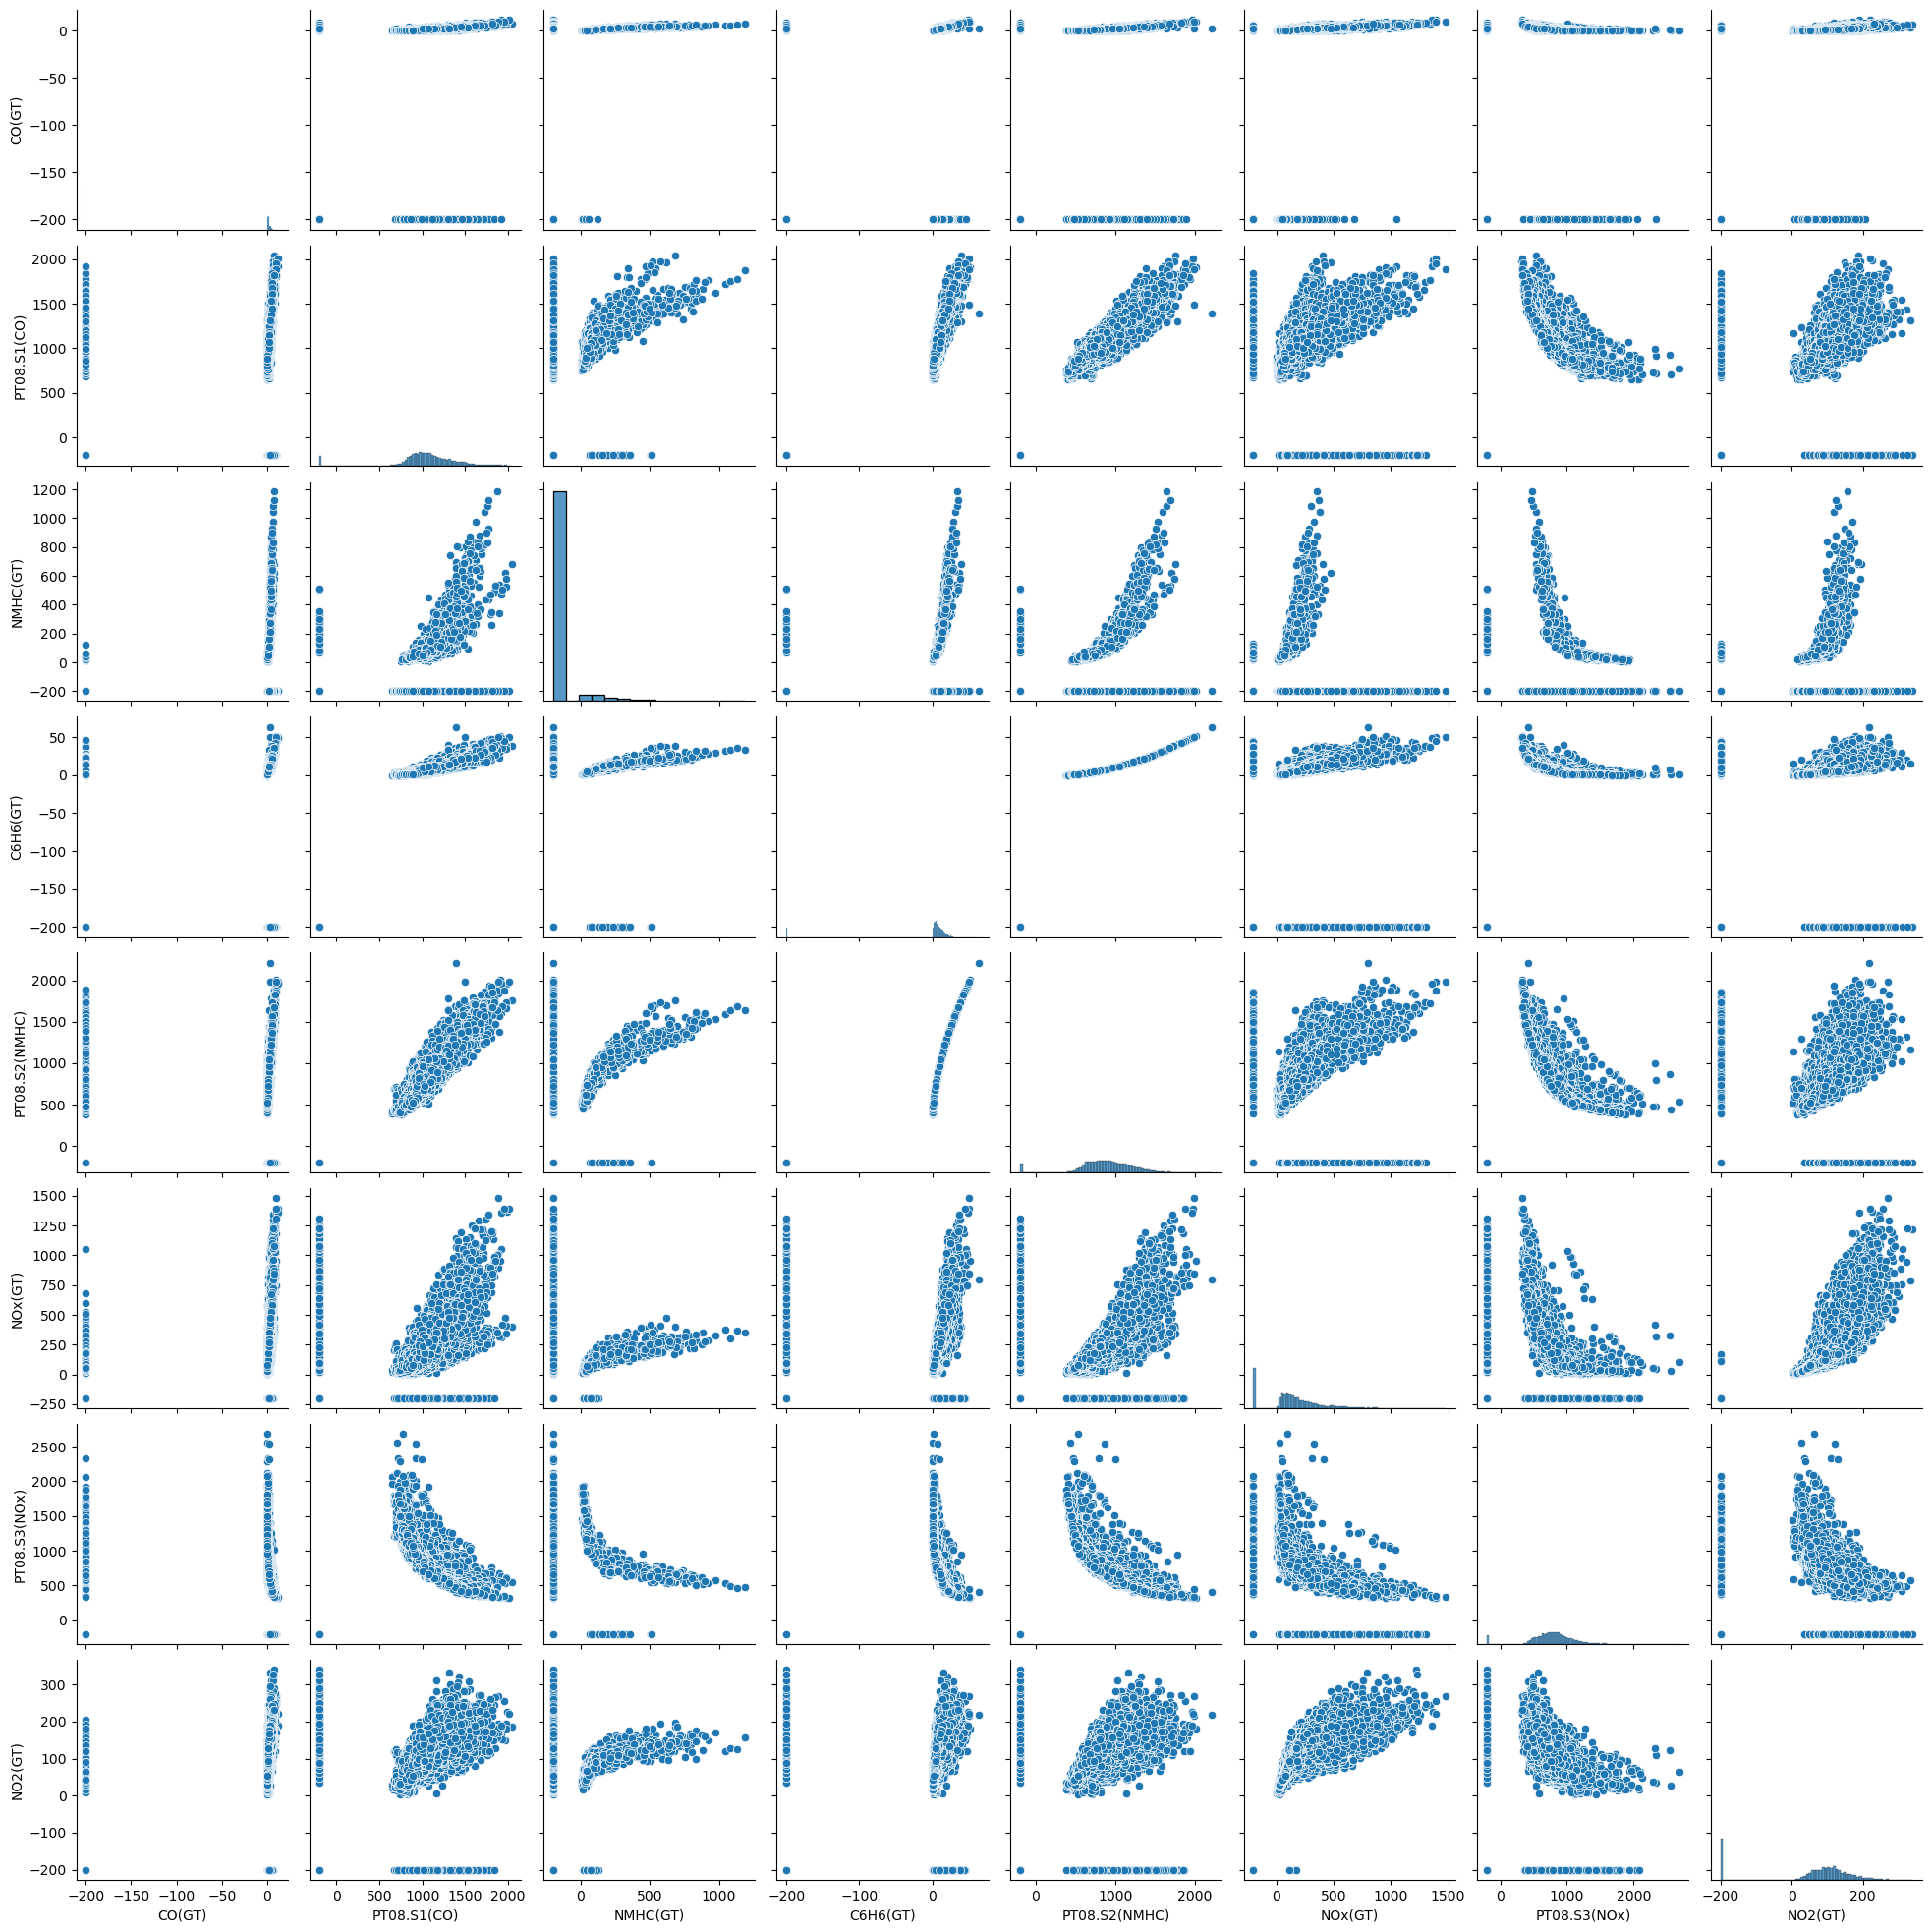

In [26]:
# Pairplots to quickly see how the features relate to each other and also their individual distributions (on the diagonal).
sns.pairplot(data = AirQuality)

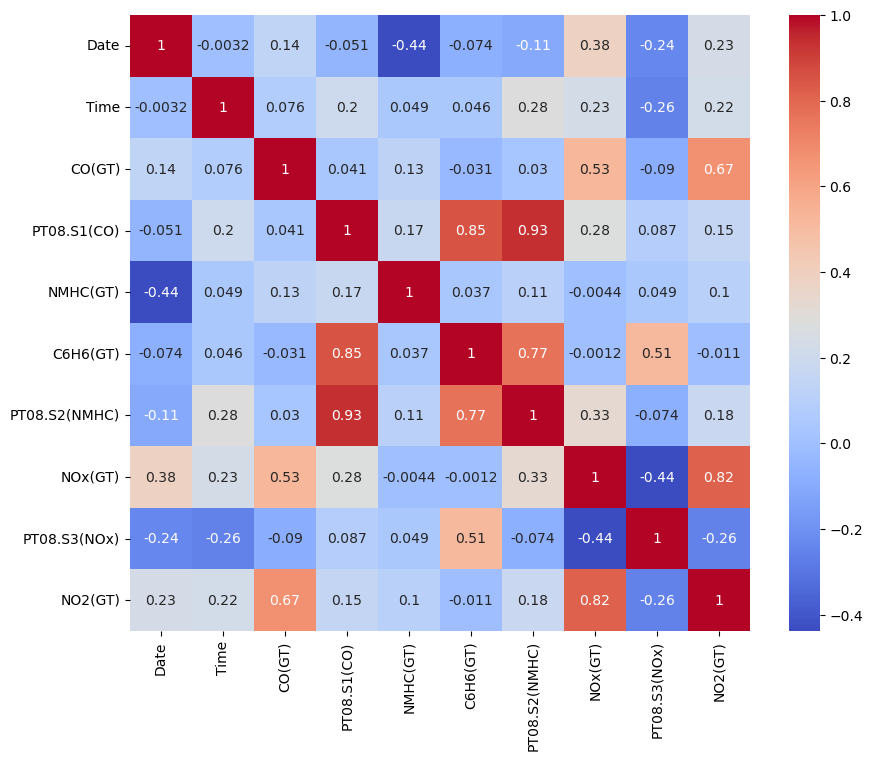

In [27]:
# Heatmap/Correlation 
plt.figure(figsize=(10,8))
sns.heatmap(AirQuality.corr(), annot=True, cmap= 'coolwarm')
plt.show()

An analysis will be conducted to remove the **-200 measurements** for all relevant variables during the experimentation phase. According to the database creator, these values indicate missing or invalid data points. Although there is a significant difference from the prior dataset, this information remains important for the project.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import os
import warnings

# Read in the CSV file again. Label it differently. 
AirQuality2 = pd.read_csv('AirQualityUCI.csv')

# To fix the date and time type object (string) format it'll be changed to datetime format.
AirQuality2['Date'] = pd.to_datetime(AirQuality2['Date'])

# Error message fixed by 'Gemini'. Provides a format='%H:%M:%S' for "10:00:00"
AirQuality2['Time'] = pd.to_datetime(AirQuality2['Time'], format='%H:%M:%S')

# Check if the columns exist before dropping
columns_to_drop = ['PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', "Unnamed: 15", "Unnamed: 16"]
existing_columns = AirQuality2.columns

# Only drop columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

AirQuality2 = AirQuality2.drop(columns=columns_to_drop, errors='ignore') #errors='ignore' will skip columns that are not found

# Drop nulls in second dataset.
AirQuality2 = AirQuality2.dropna()

# I will remove the measurements of -200 for all variables that have it, as they represent missing or invalid data points.
for column in ['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','CO(GT)','C6H6(GT)','NOx(GT)','PT08.S3(NOx)','NO2(GT)']:
    AirQuality2 = AirQuality2[AirQuality2[column] != -200]
AirQuality2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT)
0,2004-03-10,1900-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0
1,2004-03-10,1900-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0
2,2004-03-10,1900-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0
3,2004-03-10,1900-01-01 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0
4,2004-03-10,1900-01-01 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0
...,...,...,...,...,...,...,...,...,...,...
1226,2004-04-30,1900-01-01 20:00:00,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0
1227,2004-04-30,1900-01-01 21:00:00,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0
1228,2004-04-30,1900-01-01 22:00:00,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0
1229,2004-04-30,1900-01-01 23:00:00,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0


To effectively understand the dataset, several steps must be taken. First, it is essential to analyze the dataset's size, comprehend what the data represents, identify the data types, recognize unique values, and examine how these components align. As in previous projects, the OSEMN pipeline will be implemented, consisting of five key steps: obtaining the data, scrubbing and cleaning it, exploring and visualizing it to identify patterns and trends, modeling the data to achieve predictive power, and finally interpreting the results. This systematic approach ensures that the data is well-prepared for analysis, allowing for meaningful insights to be derived.

The dataset has a shape of (9471, 17), indicating that it contains 9,471 rows and 17 columns. Using the describe function reveals that the dataset summarizes numerical data and contains 9,357 valid rows out of 9,471, suggesting the presence of missing values (for instance, -200 likely indicates invalid data). The statistics demonstrate skewed distributions, with some columns exhibiting extreme outliers (e.g., the maximum value of NOx(GT) is 1,479, while the median is only 141). Two columns, Unnamed: 15 and Unnamed: 16, contain no data and can be removed.

The next step, preprocessing, will focus on addressing missing values and outliers, as well as normalizing distributions to enhance data quality. Examination of the data types shows that the date and time are stored as object (string) types, indicating they are in text format. Other columns, such as CO(GT), NOx(GT), T, and RH, are of type float64, meaning they contain numerical values with decimals. Additionally, the columns labeled Unnamed: 15 and Unnamed: 16 are also of type float64 but only contain NaN values, making them unnecessary. Before proceeding further, the date and time were converted into datetime format. Using the format '%H:%M:%S' for "10:00:00" helped correct any errors.

During an examination of the unique values, the variable 'AH' was found to have the highest count, with 6,684 values. However, this variable, along with 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', and the columns "Unnamed: 15" and "Unnamed: 16," will be excluded from the analysis due to their irrelevance to air quality research and the presence of zero values. After removing these columns, relationships among the ten remaining features can be observed. Before proceeding, the number of null values in these columns must be determined. Each of the remaining ten columns contains 114 null values. Dropping these rows reduces the total number of rows from 9,471 to 9,357.

Examining the pair plots reveals a mix of positive and negative correlations. Positive correlations suggest that as one variable increases, the other tends to increase as well, while negative correlations indicate that an increase in one variable corresponds to a decrease in another. Additionally, potential linear and nonlinear relationships appear in the data.

Focusing on the remaining data—excluding PT08.S4(NO2), PT08.S5(O3), T (Temperature in °C), RH (Relative Humidity in %), AH (Absolute Humidity in g/m³), and unnamed columns—allows for a better analysis of air quality patterns. Some variables, like PT08.S1(CO) (sensor measurement for CO concentration) and CO(GT) (carbon monoxide concentration in µg/m³), as well as NOx(GT) (nitrogen oxides concentration in µg/m³) and PT08.S3(NOx) (sensor measurement for NOx concentration), show strong positive correlations, indicating a direct relationship between pollutant concentrations and sensor readings. Other relationships, such as NO2(GT) (nitrogen dioxide concentration in µg/m³) and CO(GT), exhibit more complex or nonlinear trends. Some variables display clustered or discrete patterns, possibly representing categorical or threshold-based data points. The presence of clear trends in scatter plots suggests multicollinearity, where variables are highly interdependent, which could affect regression models by inflating variance and reducing interpretability.

Looking at the heatmap/correlation, the values range from -1 to 1, where 1 (dark red) indicates a perfect positive correlation and -1 (dark blue) indicates a negative correlation. A value of 0 (white/light colors) means no correlation. PT08.S1(CO) (Sensor measurement for CO concentration) and PT08.S2(NMHC) (Sensor measurement for NMHC concentration) have a correlation of 0.93, indicating that these variables are highly correlated and behave similarly. The correlation between NOx(GT) and NO2(GT) is approximately 0.82, indicating a strong relationship between nitrogen oxides and nitrogen dioxide. C6H6(GT) and PT08.S2(NMHC) have a correlation of about 0.77, showing that benzene concentration correlates strongly with PT08.S2(NMHC). On the other hand, looking at the negative correlations: the relationship between Date and NMHC(GT) is approximately -0.44, suggesting that NMHC(GT) levels may be decreasing over time. Similarly, NOx(GT) and PT08.S3(NOx) have a correlation of approximately -0.44, indicating an inverse relationship. Time does not show strong correlations with most variables. Some variables have correlations close to zero, meaning they are not related.

In addition to answering key research questions for this project, a test will be conducted by removing any rows containing -200, which indicate missing or invalid data points. This process will reduce the dataset from 9,357 rows and 10 columns to 827 rows and 10 columns. However, further analysis will be performed to understand the impact of this reduction on the results.

# **Experiment 1: Pre-processing**

After the dataset was cleaned and split into two versions—one retaining the -200 missing values and the other without them—all initial preprocessing steps have been completed. Unnecessary columns were dropped, and missing values were addressed, reducing null values from 114 to 0 in both datasets.

With the data now prepared for analysis, the first experiment will utilize **Linear Regression** to predict three key target variables:

**CO(GT)** – Concentration of carbon monoxide (CO) in the air (µg/m³)

**C6H6(GT)** – Concentration of benzene (C6H6) in the air (µg/m³)

**NO2(GT)** – Concentration of nitrogen dioxide (NO2) in the air (µg/m³)

These pollutants were chosen due to their significant environmental impact. This analysis will further explore the influence of meteorological factors (temperature, humidity), sensor readings, and time-based trends. Multiple regression models—including Linear Regression, Time Series Regression, Random Forest Regression, and Lasso Regression—will be leveraged to assess prediction accuracy and feature importance.

In [33]:
# Check for nulls in dataset
AirQuality.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
dtype: int64

The majority of variables do not require conversion from categorical to numerical. However, since the Date and Time columns have already been formatted as datetime, only Date will be retained for analysis. The Time variable, which holds minimal significance for this project, will be dropped to maintain focus on relevant temporal patterns.

In [35]:
# The 'Time' variable will be dropped for both datasets created.
AirQuality = AirQuality.drop(columns=['Time'])
AirQuality2 = AirQuality2.drop(columns=['Time'])

The analysis will utilize linear regression, starting with **CO(GT)**, which denotes the concentration of carbon monoxide (CO) in the air (µg/m³) as the target variable. The following attributes will be taken into consideration: 'Date', 'Time', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', and 'PT08.S3(NOx)', along with two additional target attributes.

Following this, the analysis will shift focus to **C6H6(GT)**, which indicates the concentration of benzene (C6H6) in the air (µg/m³), and **NO2(GT)**, representing the concentration of nitrogen dioxide (NO2) in the air (µg/m³). Both of these will employ the same attributes as CO(GT) as well as the target variables.

Furthermore, all three target variables will be analyzed together using the same independent variables in subsequent models.

In [37]:
# Splits date up into week, month, year columns. 
AirQuality['DayOfWeek'] = AirQuality['Date'].dt.dayofweek
AirQuality['Month'] = AirQuality['Date'].dt.month
AirQuality['Year'] = AirQuality['Date'].dt.year

In [38]:
# Splits date up into week, month, year columns. 
AirQuality2['DayOfWeek'] = AirQuality2['Date'].dt.dayofweek
AirQuality2['Month'] = AirQuality2['Date'].dt.month
AirQuality2['Year'] = AirQuality2['Date'].dt.year

The 'Date' column was transformed into numerical features—'DayOfWeek,' 'Month,' and 'Year'—despite already being in 'datetime' format. This transformation facilitated easier utilization in model development.

# **Experiment 1: Modeling**

#### Looking at **CO(GT)(9357 Samples)** Concentration of carbon monoxide (CO) in the air (µg/m³)

In [42]:
# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'C6H6(GT)', 'NO2(GT)']]
y = AirQuality['CO(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create linear regression object
AirQualityRegr = LinearRegression()

# Train the model using the training sets
AirQualityRegr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', AirQualityRegr.coef_)
print('Intercept: \n', AirQualityRegr.intercept_)

# Rounding coefficients to four decimal places
for feature, coef in zip(X_train.columns, AirQualityRegr.coef_):
    print(f"Coefficient for {feature}: {coef:.4f}")

print(f"Intercept: {AirQualityRegr.intercept_:.4f}")

Coefficients: 
 [  0.02045016  -0.05346841   0.0242028    0.01298062   1.14942314
  -0.19834827 -11.64972472   0.09364367   0.40181561]
Intercept: 
 23300.94478322649
Coefficient for PT08.S1(CO): 0.0205
Coefficient for PT08.S2(NMHC): -0.0535
Coefficient for NOx(GT): 0.0242
Coefficient for PT08.S3(NOx): 0.0130
Coefficient for DayOfWeek: 1.1494
Coefficient for Month: -0.1983
Coefficient for Year: -11.6497
Coefficient for C6H6(GT): 0.0936
Coefficient for NO2(GT): 0.4018
Intercept: 23300.9448


The regression analysis indicates that **PT08.S1(CO) (0.0205)** and **NOx(GT) (0.0242)** have a weak positive correlation with the target variable, while **PT08.S2(NMHC) (-0.0535)** and **Month (-0.1983)** show a negative impact. **DayOfWeek (1.1494)** suggests a strong temporal influence, possibly linked to weekly pollution patterns. The **Year coefficient (-11.6497)** indicates a declining trend in pollution over time. Additionally, **C6H6(GT) (0.0936)** and **NO2(GT) (0.4018)** positively contribute, reinforcing their link to air quality variations. The high **intercept (23300.9448)** serves as a baseline but lacks direct interpretability.

#### Looking at **CO(GT)(827 Samples)** Concentration of carbon monoxide (CO) in the air (µg/m³)

In [46]:
# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'C6H6(GT)', 'NO2(GT)']]
y = AirQuality2['CO(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQuality2Regr = LinearRegression()

# Train the model using the training sets
AirQuality2Regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', AirQuality2Regr.coef_)
print('Intercept: \n', AirQuality2Regr.intercept_)

# Rounding coefficients to four decimal places
for feature, coef in zip(X_train.columns, AirQuality2Regr.coef_):
    print(f"Coefficient for {feature}: {coef:.4f}")

print(f"Intercept: {AirQuality2Regr.intercept_:.4f}")

Coefficients: 
 [ 4.82400771e-04 -2.53092376e-03  4.93968850e-03 -1.73617863e-04
  2.52304175e-02  1.60434057e-02 -4.16333634e-17  1.86999432e-01
  5.05689651e-03]
Intercept: 
 1.0287507613102413
Coefficient for PT08.S1(CO): 0.0005
Coefficient for PT08.S2(NMHC): -0.0025
Coefficient for NOx(GT): 0.0049
Coefficient for PT08.S3(NOx): -0.0002
Coefficient for DayOfWeek: 0.0252
Coefficient for Month: 0.0160
Coefficient for Year: -0.0000
Coefficient for C6H6(GT): 0.1870
Coefficient for NO2(GT): 0.0051
Intercept: 1.0288


The regression results indicate that **C6H6(GT) (0.1870)** and **NO2(GT) (0.0051)** have the strongest positive influence on the target variable, while **PT08.S2(NMHC) (-0.0025)** and **PT08.S3(NOx) (-0.0002)** show weak negative correlations. **DayOfWeek (0.0252)** and **Month (0.0160)** suggest temporal trends, whereas **Year (-0.0000)** has almost no effect. The **intercept (1.0288)** represents the baseline value when all predictors are zero but has limited real-world interpretability.

#### Looking at **C6H6(GT)(9357 Samples)** – Concentration of benzene (C6H6) in the air (µg/m³)


In [49]:
# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'NO2(GT)']]
y = AirQuality['C6H6(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQualityRegr = LinearRegression()

# Train the model using the training sets
AirQualityRegr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', AirQualityRegr.coef_)
print('Intercept: \n', AirQualityRegr.intercept_)

# Rounding coefficients to four decimal places
for feature, coef in zip(X_train.columns, AirQualityRegr.coef_):
    print(f"Coefficient for {feature}: {coef:.4f}")

print(f"Intercept: {AirQualityRegr.intercept_:.4f}")

Coefficients: 
 [ 4.86679509e-02  6.17766872e-02 -3.56070571e-02  6.28514864e-02
  1.38370703e-01  2.31500476e+00  2.30612130e+01  1.95269548e-03
  3.66595958e-02]
Intercept: 
 -46385.74058213762
Coefficient for PT08.S1(CO): 0.0487
Coefficient for PT08.S2(NMHC): 0.0618
Coefficient for NOx(GT): -0.0356
Coefficient for PT08.S3(NOx): 0.0629
Coefficient for DayOfWeek: 0.1384
Coefficient for Month: 2.3150
Coefficient for Year: 23.0612
Coefficient for CO(GT): 0.0020
Coefficient for NO2(GT): 0.0367
Intercept: -46385.7406


The regression results indicate that both **Year (23.0612)** and **Month (2.3150)** have the strongest positive influence on the target variable, highlighting a significant temporal trend. Additionally, **PT08.S2(NMHC) (0.0618)** and **PT08.S3(NOx) (0.0629)** also show positive contributions to the model. In contrast, **NOx(GT) (-0.0356)** exhibits a negative correlation. The **DayOfWeek variable (0.1384)** suggests minor variations in pollutant concentrations throughout the week. Notably, the **intercept (-46385.7406)** is significantly large and negative, indicating a baseline shift in the model. These insights provide a better understanding of the factors influencing pollutant concentration.

#### Looking at **C6H6(GT)(827 Samples)** – Concentration of benzene (C6H6) in the air (µg/m³)

In [52]:
# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'NO2(GT)']]
y = AirQuality2['C6H6(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQuality2Regr = LinearRegression()

# Train the model using the training sets
AirQuality2Regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', AirQuality2Regr.coef_)
print('Intercept: \n', AirQuality2Regr.intercept_)

# Rounding coefficients to four decimal places
for feature, coef in zip(X_train.columns, AirQuality2Regr.coef_):
    print(f"Coefficient for {feature}: {coef:.4f}")

print(f"Intercept: {AirQuality2Regr.intercept_:.4f}")

Coefficients: 
 [ 7.83324276e-04  2.84651306e-02 -8.89690290e-04  6.45987006e-03
 -7.30023224e-02  5.96237662e-01 -9.99200722e-16  1.29283627e+00
 -2.23670701e-02]
Intercept: 
 -26.5000636419894
Coefficient for PT08.S1(CO): 0.0008
Coefficient for PT08.S2(NMHC): 0.0285
Coefficient for NOx(GT): -0.0009
Coefficient for PT08.S3(NOx): 0.0065
Coefficient for DayOfWeek: -0.0730
Coefficient for Month: 0.5962
Coefficient for Year: -0.0000
Coefficient for CO(GT): 1.2928
Coefficient for NO2(GT): -0.0224
Intercept: -26.5001


The model shows that **CO(GT) (1.2928)** has the strongest positive impact on pollution, while **NO2(GT) (-0.0224)** and **NOx(GT) (-0.0009)** have slight negative effects. Seasonal trends matter, as indicated by **Month (0.5962)**, and pollution tends to be lower on certain days **(DayOfWeek -0.0730)**. The **intercept (-26.5001)** is a baseline reference. Overall, CO is the key driver of pollution, with seasonal and weekly variations also playing a role.

#### Looking at **NO2(GT)(9357 Samples)** – Concentration of nitrogen dioxide (NO2) in the air (µg/m³)

In [55]:
# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'C6H6(GT)']]
y = AirQuality['NO2(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQualityRegr = LinearRegression()

# Train the model using the training sets
AirQualityRegr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', AirQualityRegr.coef_)
print('Intercept: \n', AirQualityRegr.intercept_)

# Rounding coefficients to four decimal places
for feature, coef in zip(X_train.columns, AirQualityRegr.coef_):
    print(f"Coefficient for {feature}: {coef:.4f}")

print(f"Intercept: {AirQualityRegr.intercept_:.4f}")

Coefficients: 
 [ -0.14496149  -0.07441677   0.41506342  -0.07297397   0.11393496
 -12.79141671 -69.06146927   0.39544291   1.73016919]
Intercept: 
 138770.90760013167
Coefficient for PT08.S1(CO): -0.1450
Coefficient for PT08.S2(NMHC): -0.0744
Coefficient for NOx(GT): 0.4151
Coefficient for PT08.S3(NOx): -0.0730
Coefficient for DayOfWeek: 0.1139
Coefficient for Month: -12.7914
Coefficient for Year: -69.0615
Coefficient for CO(GT): 0.3954
Coefficient for C6H6(GT): 1.7302
Intercept: 138770.9076


The model indicates that **C6H6(GT) (1.7302)** has the strongest positive influence on pollution levels, followed by **NOx(GT) (0.4151)** and **CO(GT) (0.3954)**. In contrast, the variables **Month (-12.7914)** and **Year (-69.0615)** suggest a declining trend in pollution over time. Additionally, **PT08.S1(CO)**, **PT08.S2(NMHC)**, and **PT08.S3(NOx)** have minor negative effects, while **DayOfWeek (0.1139)** reflects slight variations throughout the week. The **intercept (138770.9076)** serves as a baseline reference point.

#### Looking at **NO2(GT)(827 Samples)** – Concentration of nitrogen dioxide (NO2) in the air (µg/m³)

In [58]:
# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'C6H6(GT)']]
y = AirQuality2['NO2(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQuality2Regr = LinearRegression()

# Train the model using the training sets
AirQuality2Regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', AirQuality2Regr.coef_)
print('Intercept: \n', AirQuality2Regr.intercept_)

# Rounding coefficients to four decimal places
for feature, coef in zip(X_train.columns, AirQuality2Regr.coef_):
    print(f"Coefficient for {feature}: {coef:.4f}")

print(f"Intercept: {AirQuality2Regr.intercept_:.4f}")

Coefficients: 
 [ 2.15358369e-02  2.40781098e-01  3.64597195e-02  2.12796506e-02
 -7.03471017e-01 -3.75949152e+00 -1.77635684e-14  1.18319462e+01
 -7.56968794e+00]
Intercept: 
 -115.3371756786383
Coefficient for PT08.S1(CO): 0.0215
Coefficient for PT08.S2(NMHC): 0.2408
Coefficient for NOx(GT): 0.0365
Coefficient for PT08.S3(NOx): 0.0213
Coefficient for DayOfWeek: -0.7035
Coefficient for Month: -3.7595
Coefficient for Year: -0.0000
Coefficient for CO(GT): 11.8319
Coefficient for C6H6(GT): -7.5697
Intercept: -115.3372


The regression model predicts NO₂(GT) using sensor readings and temporal features. **PT08.S1(CO) (0.0215)** and **PT08.S2(NMHC) (0.2408)** have small positive effects, while **NOx(GT) (0.0365)** and **PT08.S3(NOx) (0.0213)** show minimal positive contributions. **DayOfWeek (-0.7035)** negatively impacts NO₂(GT), and **Month (-3.7595)** indicates a seasonal decrease. **Year (-0.0000)** is not significant. **CO(GT) (11.8319)** has the largest positive effect, and **C6H6(GT) (-7.5697)** negatively influences NO₂(GT). The **intercept (-115.3372)** represents the baseline NO₂(GT) when predictors are zero, although it's less meaningful in practical terms.

# **Experiment 1: Evaluation**

#### Looking at **CO(GT)(9357 Samples)** Concentration of carbon monoxide (CO) in the air (µg/m³): **Root Mean Squared Error (RMSE)**

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'C6H6(GT)', 'NO2(GT)']]
y = AirQuality['CO(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQualityRegr = LinearRegression()

# Train the model using the training sets
AirQualityRegr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = AirQualityRegr.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 53.3754


#### Looking at **CO(GT)(827 Samples)** Concentration of carbon monoxide (CO) in the air (µg/m³): **Root Mean Squared Error (RMSE)**

In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'C6H6(GT)', 'NO2(GT)']]
y = AirQuality2['CO(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQuality2Regr = LinearRegression()

# Train the model using the training sets
AirQuality2Regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = AirQuality2Regr.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 0.2554


The Root Mean Squared Error (RMSE) indicates how well a model's predictions match actual values. In the first dataset with 9,357 samples, the RMSE was **53.3754**, showing high prediction error. In the second dataset with 827 samples, the RMSE dropped to **0.2554**, suggesting better accuracy. However, this improvement may not reflect a superior model; it could be due to differences in data distribution, feature importance, or overfitting, where the model learns patterns specific to the smaller dataset instead of general trends.


#### Looking at **C6H6(GT)(9357 Samples)** – Concentration of benzene (C6H6) in the air (µg/m³): **Root Mean Squared Error (RMSE)**

In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'NO2(GT)']]
y = AirQuality['C6H6(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQualityRegr = LinearRegression()

# Train the model using the training sets
AirQualityRegr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = AirQualityRegr.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 7.9895


#### Looking at **C6H6(GT)(827 Samples)** – Concentration of benzene (C6H6) in the air (µg/m³): **Root Mean Squared Error (RMSE)**

In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'NO2(GT)']]
y = AirQuality2['C6H6(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQuality2Regr = LinearRegression()

# Train the model using the training sets
AirQuality2Regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = AirQuality2Regr.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 0.7839


The two linear regression models predict benzene concentration ('C6H6(GT)') using air quality and weather data. However, they perform very differently. The model using a larger dataset of 9,357 samples has a **high RMSE of 7.9895**, which shows it is not very accurate. Meanwhile, the model based on a smaller dataset of 827 samples has a much **lower RMSE of 0.7839**, indicating better performance. The difference in performance comes from outliers in the larger dataset, which can disrupt the model's learning. The smaller dataset may be cleaner, leading to better accuracy. 

#### Looking at **NO2(GT)(9357 Samples)** – Concentration of nitrogen dioxide (NO2) in the air (µg/m³): **Root Mean Squared Error (RMSE)**

In [72]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'C6H6(GT)']]
y = AirQuality['NO2(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQualityRegr = LinearRegression()

# Train the model using the training sets
AirQualityRegr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = AirQualityRegr.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 54.1305


#### Looking at **NO2(GT)(827 Samples)** – Concentration of nitrogen dioxide (NO2) in the air (µg/m³): **Root Mean Squared Error (RMSE)**

In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'C6H6(GT)']]
y = AirQuality2['NO2(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
AirQuality2Regr = LinearRegression()

# Train the model using the training sets
AirQuality2Regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = AirQuality2Regr.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 12.7858


The results show how well Linear Regression models predict NO₂ (GT) concentration using air quality and weather data. The first model has a high Root Mean Squared Error (RMSE) of **54.1305, indicating poor accuracy**. In contrast, the second model has a much **lower RMSE of 12.7858**, showing better performance. This difference may come from variations in data quality or inconsistencies between datasets, as well as preprocessing techniques like feature selection and handling missing values.

# **Experiment 2: Random Forest**

#### Looking at **CO(GT)(9357 Samples):** Concentration of carbon monoxide (CO) in the air (µg/m³): **Feature Importance & Root Mean Squared Error (RMSE)**

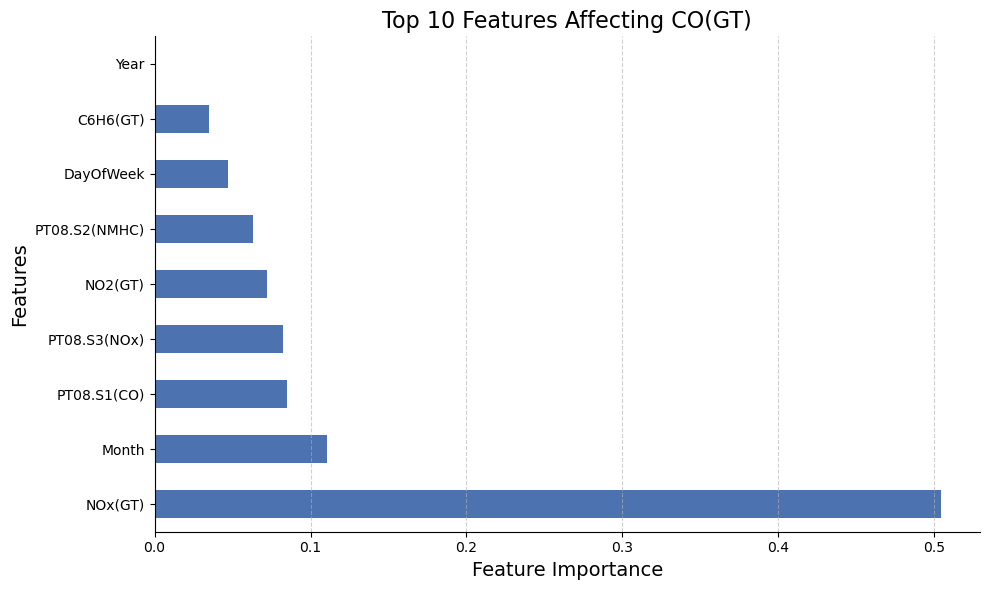

Root Mean Squared Error: 44.2424


In [78]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'C6H6(GT)', 'NO2(GT)']]
y = AirQuality['CO(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Looking at random forest
rf_CO = RandomForestRegressor(n_estimators=100, random_state=42)
rf_CO.fit(X_train, y_train)

# Feature importance plot for CO(GT): Helped developed by Gemini Ai
feature_importance = pd.Series(rf_CO.feature_importances_, index=X_train.columns)

# Plot figure 
plt.figure(figsize=(10, 6))

ax = feature_importance.nlargest(10).plot(kind='barh', color='#4C72B0')  # Color hue
ax.set_xlabel("Feature Importance", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.set_title("Top 10 Features Affecting CO(GT)", fontsize=16)
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.6)  # Gridlines
plt.tight_layout()  # Layout
plt.show()

# y_pred and Calculate RMSE
y_pred = rf_CO.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

The feature importance chart reveals that the concentration of nitrogen oxides **(NOx) in the air (µg/m³)** has the highest importance score of 0.51. The **month** is the second most important feature, with a score of 0.12, likely influenced by seasonal variations due to weather or human activities. In contrast, the **concentration of benzene (C6H6) in the air (µg/m³)** has a relatively low importance score of around 0.2, while the **year** has a score of 0.0. When considering features that impact carbon monoxide levels, this analysis of air pollution data suggests that regulatory actions targeting NOx emissions, along with an understanding of seasonal variations, could help mitigate CO pollution. 

The root mean squared error (RMSE) decreases to **44.24** when using random forest, compared to the previously examined RMSE of **53.38**( from linear regression. This indicates an improvement in accuracy, likely due to the random forest's ability to capture complex relationships. However, it is still not considered the best model overall. The random forest likely better leveraged the importance of NOx (GT) and seasonal patterns in ways that a simple linear model could not.

#### Looking at **CO(GT)(827 Samples):** Concentration of carbon monoxide (CO) in the air (µg/m³): **Feature Importance & Root Mean Squared Error (RMSE)**

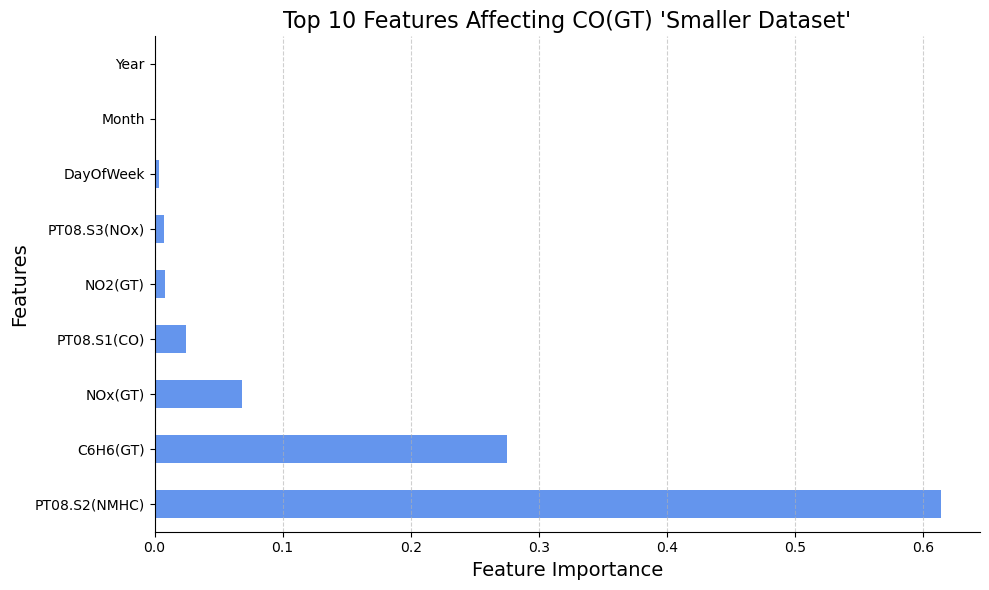

Root Mean Squared Error: 0.2618


In [81]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'C6H6(GT)', 'NO2(GT)']]
y = AirQuality2['CO(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Looking at random forest
rf_CO_2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_CO_2.fit(X_train, y_train)

# Feature importance plot for CO(GT)
feature_importance = pd.Series(rf_CO_2.feature_importances_, index=X_train.columns)

# Plot figure: Helped developed by Gemini Ai
plt.figure(figsize=(10, 6))

ax = feature_importance.nlargest(10).plot(kind='barh', color='#6495ED')  # Color hue
ax.set_xlabel("Feature Importance", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.set_title("Top 10 Features Affecting CO(GT) 'Smaller Dataset'", fontsize=16)
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.6)  # Gridlines
plt.tight_layout()  # Layout
plt.show()

# y_pred and Calculate RMSE
y_pred = rf_CO_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

When examining the smaller dataset, **PTO8.S2 (NMHC)**, which measures NMHC concentration, demonstrates the highest importance at 0.63. The **concentration of benzene (C6H6)** in the air, measured by C6H6 (GT), ranks second with an importance value of approximately 0.28. The lowest importance values are observed for the month, which is zero, as well as for the day of the week, **PT08.S3 (NOx)**, and **NO2 (GT)**, which range between 0.0 and 0.2. Nonetheless, if NOx (GT) is indeed the most important feature in the full dataset, the limited sample size of 827 may not accurately represent the true distribution, potentially altering the overall perspective of the dataset.

When analyzing the root mean squared error (RMSE) of the smaller dataset, it increased to **0.2618** compared to the previous RMSE of **0.2554** from the linear regression model. This indicates that the model is performing slightly worse. Unlike Random Forests, which handle missing data patterns more effectively, linear regression heavily relies on the distribution of the data. Removing over 90% of the data may have altered some relationships, which could explain why the model is less effective.

#### Looking at **C6H6(GT)(9357 Samples)** – Concentration of benzene (C6H6) in the air (µg/m³):  **Feature Importance & Root Mean Squared Error (RMSE)**

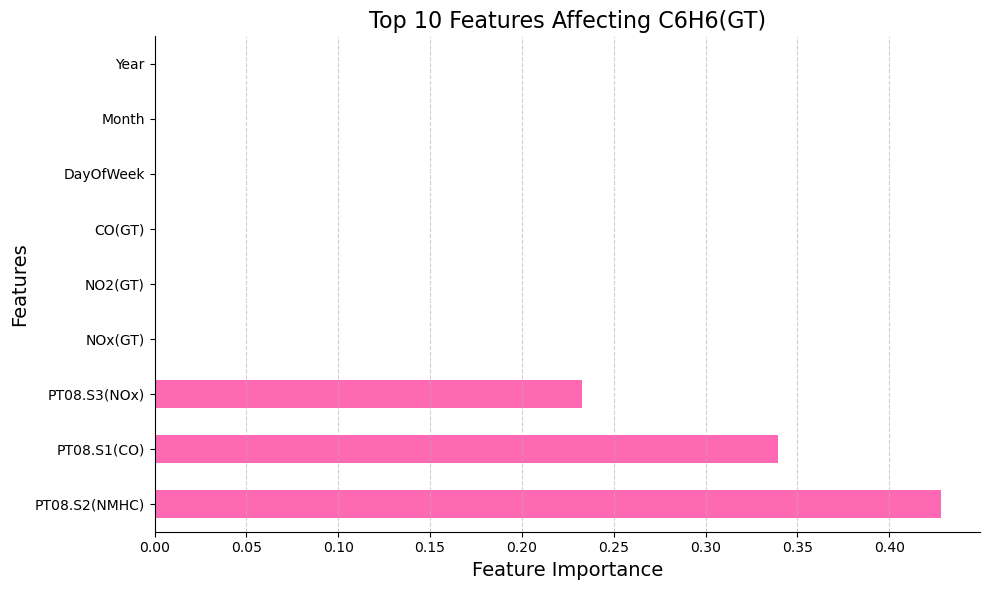

Root Mean Squared Error: 0.0799


In [84]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'NO2(GT)']]
y = AirQuality['C6H6(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Looking at random forest
rf_C6H6 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_C6H6.fit(X_train, y_train)

# Feature importance plot for CO(GT): Helped developed by Gemini Ai
feature_importance = pd.Series(rf_C6H6.feature_importances_, index=X_train.columns)

# Plot figure 
plt.figure(figsize=(10, 6))

ax = feature_importance.nlargest(10).plot(kind='barh', color='#FF69B4')  # Color hue
ax.set_xlabel("Feature Importance", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.set_title("Top 10 Features Affecting C6H6(GT)", fontsize=16)
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.6)  # Gridlines
plt.tight_layout()  # Layout
plt.show()

# y_pred and Calculate RMSE
y_pred = rf_C6H6.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

The feature importance for chat **PTO8(NMHC)** is 0.42, making it the most significant variable. Following that, **PT08.S1(CO)** has an importance of 0.34, and **PT08.S3(NOx)** ranks third with an importance of 0.25. The other variables have an importance score of zero. While CO and NOx are directly related to air pollution, their individual contributions to predicting benzene levels are not as prominent. This indicates that fluctuations in benzene levels are more influenced by interactions among pollutants rather than by seasonal or weekly changes.

The root mean squared error (RMSE) is now **0.0799**, significantly lower than the linear regression model's RMSE of **7.9895**. This decrease indicates improved accuracy and significance in the model's predictions. The algorithm excels in capturing non-linear relationships between features, demonstrating that it is effectively identifying patterns much better than linear regression.

#### Looking at **C6H6(GT)(827 Samples)** – Concentration of benzene (C6H6) in the air (µg/m³):  **Feature Importance & Root Mean Squared Error (RMSE)**

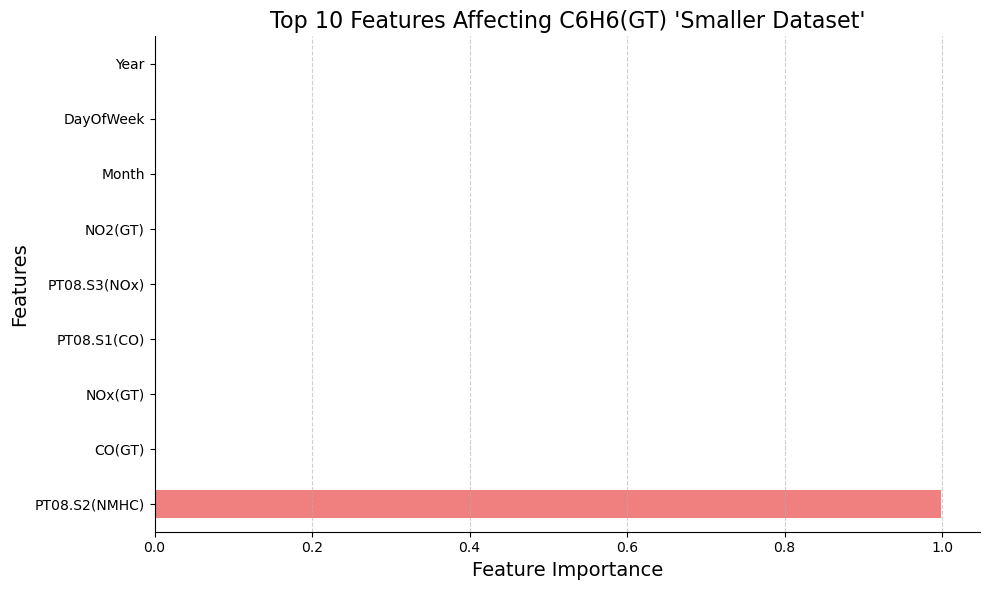

Root Mean Squared Error: 0.1892


In [87]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'NO2(GT)']]
y = AirQuality2['C6H6(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Looking at random forest
rf_C6H6_2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_C6H6_2.fit(X_train, y_train)

# Feature importance plot for CO(GT): Helped developed by Gemini Ai
feature_importance = pd.Series(rf_C6H6_2.feature_importances_, index=X_train.columns)

# Plot figure 
plt.figure(figsize=(10, 6))

ax = feature_importance.nlargest(10).plot(kind='barh', color='#F08080')  # Color hue
ax.set_xlabel("Feature Importance", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.set_title("Top 10 Features Affecting C6H6(GT) 'Smaller Dataset'", fontsize=16)
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.6)  # Gridlines
plt.tight_layout()  # Layout
plt.show()

# y_pred and Calculate RMSE
y_pred = rf_C6H6_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

When examining the feature importance chart, **PT08.S2(NMHC)** stands out as the only feature with an importance score close to 1.0, while all other features have a score of 0.0. This analysis is based on a smaller dataset of 827 samples related to the factors affecting C6H6 levels. The limited number of data points may have caused the model to overfit to this one strong predictor, effectively disregarding the contribution of other features.

The root mean squared error (RMSE) for the random forest regression model is **0.1892**, which is an improvement compared to the linear regression model with an RMSE of **0.7839**. This indicates that the random forest regression provides a significantly better fit for both the larger and smaller datasets of C6H6. Therefore, it suggests that using random forest regression is the preferred approach for achieving a more accurate model.

#### Looking at **NO2(GT)(9357 Samples)** – Concentration of nitrogen dioxide (NO2) in the air (µg/m³): **Feature Importance & Root Mean Squared Error (RMSE)**

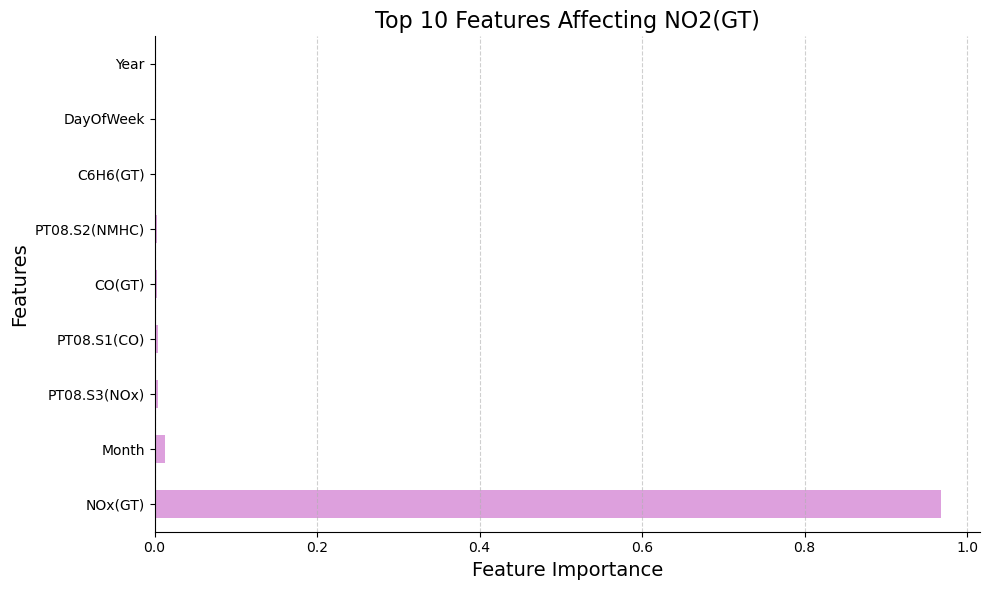

Root Mean Squared Error: 16.4443


In [90]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'C6H6(GT)']]
y = AirQuality['NO2(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Looking at random forest
rf_NO2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_NO2.fit(X_train, y_train)

# Feature importance plot for CO(GT): Helped developed by Gemini Ai
feature_importance = pd.Series(rf_NO2.feature_importances_, index=X_train.columns)

# Plot figure 
plt.figure(figsize=(10, 6))

ax = feature_importance.nlargest(10).plot(kind='barh', color='#DDA0DD')  # Color hue
ax.set_xlabel("Feature Importance", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.set_title("Top 10 Features Affecting NO2(GT)", fontsize=16)
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.6)  # Gridlines
plt.tight_layout()  # Layout
plt.show()

# y_pred and Calculate RMSE
y_pred = rf_NO2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

Examining the feature importance chart reveals that **NOx(GT)** has an importance score between 0.9 and 1.0. In contrast, other features such as **month**, **PTO8.S3 (NOx)**, and **PTO8.S1 (CO)** have scores of less than 0.1. This indicates that NOx(GT) plays a significantly greater role in determining the importance of NO2(GT), likely due to its strong correlation with it. The high feature importance suggests that fluctuations in NOx(GT) levels directly affect the concentrations of NO2(GT), probably as a result of atmospheric chemical reactions.

The root mean squared error (RMSE) for the time series regression model is **16.44**, compared to **54.13** for the linear regression model. This represents a significant improvement, indicating that the time series regression model is a better option for determining accuracy and reliability.

#### Looking at **NO2(GT)(827 Samples)** – Concentration of nitrogen dioxide (NO2) in the air (µg/m³):  **Feature Importance & Root Mean Squared Error (RMSE)**

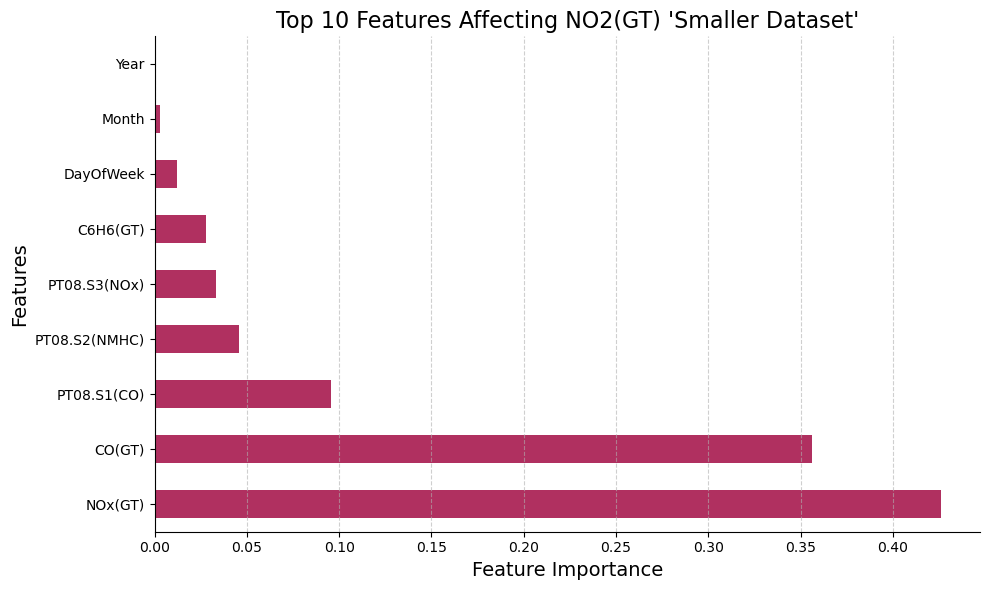

Root Mean Squared Error: 11.4290


In [93]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'C6H6(GT)']]
y = AirQuality2['NO2(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Looking at random forest
rf_NO2_2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_NO2_2.fit(X_train, y_train)

# Feature importance plot for CO(GT): Helped developed by Gemini Ai
feature_importance = pd.Series(rf_NO2_2.feature_importances_, index=X_train.columns)

# Plot figure 
plt.figure(figsize=(10, 6))

ax = feature_importance.nlargest(10).plot(kind='barh', color='#B03060')  # Color hue
ax.set_xlabel("Feature Importance", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.set_title("Top 10 Features Affecting NO2(GT) 'Smaller Dataset'", fontsize=16)
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.6)  # Gridlines
plt.tight_layout()  # Layout
plt.show()

# y_pred and Calculate RMSE
y_pred = rf_NO2_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

When reviewing the feature importance chart,**NOx(GT)** emerges as the most significant factor with a score of 0.43. Following that, **CO(GT)** holds the second position with a score of 0.36, and **PTO8.S1(CO)** ranks third with a score of 0.09. Meanwhile, **PTO8.S3(NOx)** and the remaining variables each have scores of less than 0.03. Nonetheless, all these factors contribute to the determination of NO2(GT).

The root mean squared error (RMSE) is **11.42**, while the linear regression model has an RMSE of **12.79**. There is a slight difference between the two, and it may be worth exploring other alternatives to improve accuracy. Overall, this data suggests that random forest regression is a better choice.

# **Experiment 3: Lasso Regression**

Install the necessary libraries for this project

In [97]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import os
import warnings
from sklearn import linear_model

#### Looking at **CO(GT)(9357 Samples)** Concentration of carbon monoxide (CO) in the air (µg/m³)

In [99]:
# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'C6H6(GT)', 'NO2(GT)']]
y = AirQuality['CO(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rsme_lasso = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results for CO(GT):")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rsme_lasso:.4f}")
print(f"R-squared: {r2:.4f}")

Lasso Regression Results for CO(GT):
Mean Squared Error: 2851.8138
Root Mean Squared Error: 53.4024
R-squared: 0.5173


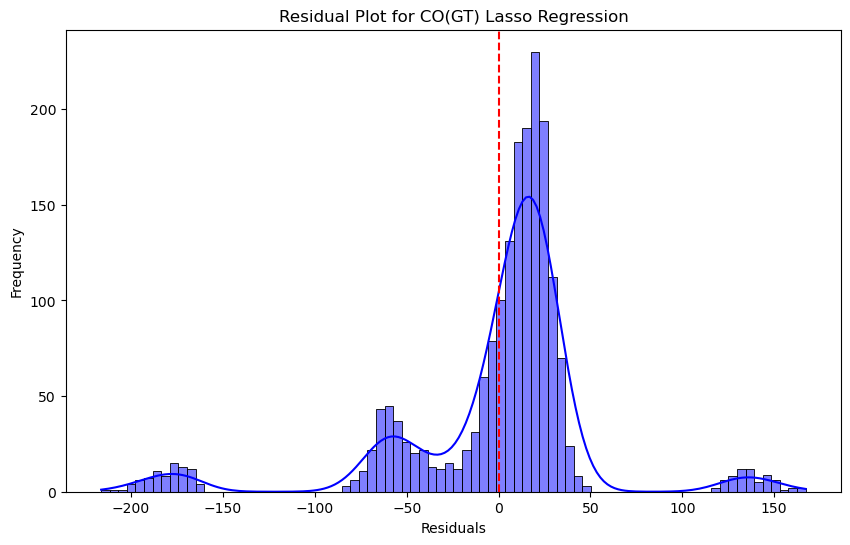

In [100]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot for CO(GT) Lasso Regression')
plt.show()

The results of the Lasso Regression for CO(GT) indicate a moderate model performance, with an R-squared value of 0.5173. This means that approximately **51.73% of the variance in CO(GT)** is explained by the model. The **RMSE (Root Mean Square Error) of 53.4** suggests a moderate level of prediction error. However, the residual plot reveals a non-normal distribution with multiple peaks, which suggests potential heteroscedasticity or underfitting. The presence of long tails in the residuals indicates that some predictions deviate significantly, possibly due to missing key features or non-linearity in the data. To improve the model, it may be helpful to adjust the regularization parameter in Lasso, explore other regression techniques. Nonetheless, given its reliability is comparable to that of linear regression, Random Forest regression remains the best choice.

#### Looking at **CO(GT)(827 Samples)** Concentration of carbon monoxide (CO) in the air (µg/m³)

In [103]:
# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'C6H6(GT)', 'NO2(GT)']]
y = AirQuality2['CO(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rsme_lasso = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results for CO(GT) 'Smaller Dataset':")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rsme_lasso:.4f}")
print(f"R-squared: {r2:.4f}")

Lasso Regression Results for CO(GT) 'Smaller Dataset':
Mean Squared Error: 0.0746
Root Mean Squared Error: 0.2730
R-squared: 0.9642


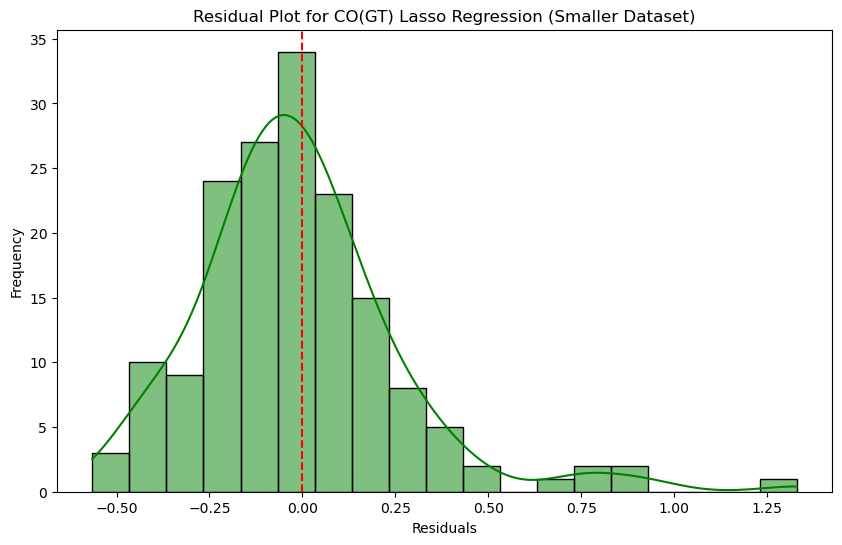

In [104]:
# Residual Plot
residuals2 = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals2, kde=True, color='green')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot for CO(GT) Lasso Regression (Smaller Dataset)')
plt.show()

The Lasso regression model for the CO(GT) dataset demonstrates strong performance, with an **R² value of 0.9642**, a **Mean Squared Error (MSE) of 0.0746**, and a **Root Mean Squared Error (RMSE) of 0.2730**, indicating high predictive accuracy. The residual plot reveals a primarily normal distribution centered around zero, although it shows a slight right skew, suggesting the presence of minor outliers or heteroscedasticity. In comparison to the linear regression and random forest regression models, the RMSE increased to 0.2730. There appears to be a consistent trend of the RMSE rising, with linear regression typically performing the worst, while the random forest model demonstrates better results in this sample for CO(GT).

#### Looking at **C6H6(GT)(9357 Samples)** – Concentration of benzene (C6H6) in the air (µg/m³)

In [107]:
# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'NO2(GT)']]
y = AirQuality['C6H6(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rsme_lasso = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results for C6H6(GT):")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rsme_lasso:.4f}")
print(f"R-squared: {r2:.4f}")

Lasso Regression Results for C6H6(GT):
Mean Squared Error: 64.4618
Root Mean Squared Error: 8.0288
R-squared: 0.9618


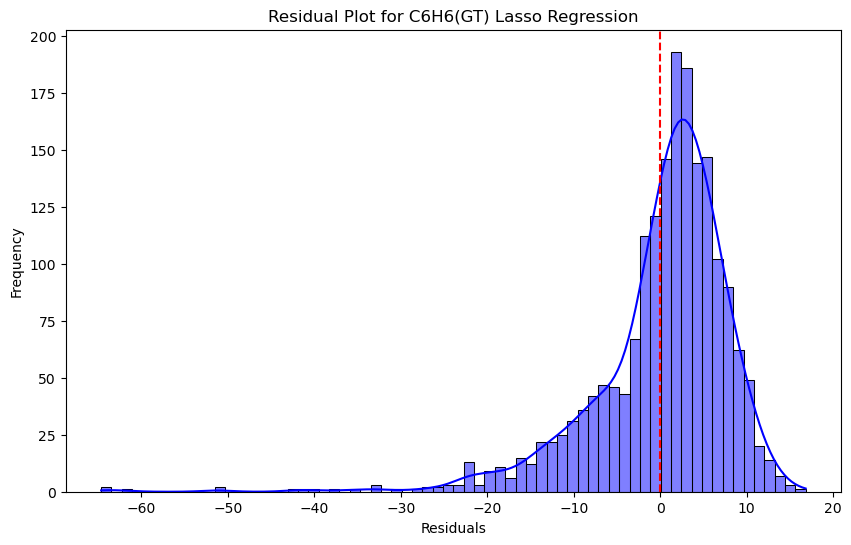

In [108]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot for C6H6(GT) Lasso Regression')
plt.show()

The Lasso regression model for C6H6(GT) demonstrates strong performance, achieving an **R² of 0.9618**. This indicates that the model explains most of the variance in the data. However, the **mean squared error (MSE) of 64.4618** and **root mean squared error (RMSE) of 8.0288** suggest that the model has larger errors compared to the CO(GT) model. While the fit of the model is generally good, the higher error values may indicate greater variability or the presence of outliers in the dataset. Additionally, the RMSE for the Lasso regression is higher than that of the linear regression model, which has an RMSE of 7.9895, and the random forest regression model, which has a significantly lower RMSE of 0.0799. This comparison suggests that random forest regression is the superior model.

#### Looking at **C6H6(GT)(827 Samples)** – Concentration of benzene (C6H6) in the air (µg/m³)

In [111]:
# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'NO2(GT)']]
y = AirQuality2['C6H6(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rsme_lasso = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results for C6H6(GT) 'Smaller Dataset':")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rsme_lasso:.4f}")
print(f"R-squared: {r2:.4f}")

Lasso Regression Results for C6H6(GT) 'Smaller Dataset':
Mean Squared Error: 1.1652
Root Mean Squared Error: 1.0795
R-squared: 0.9804


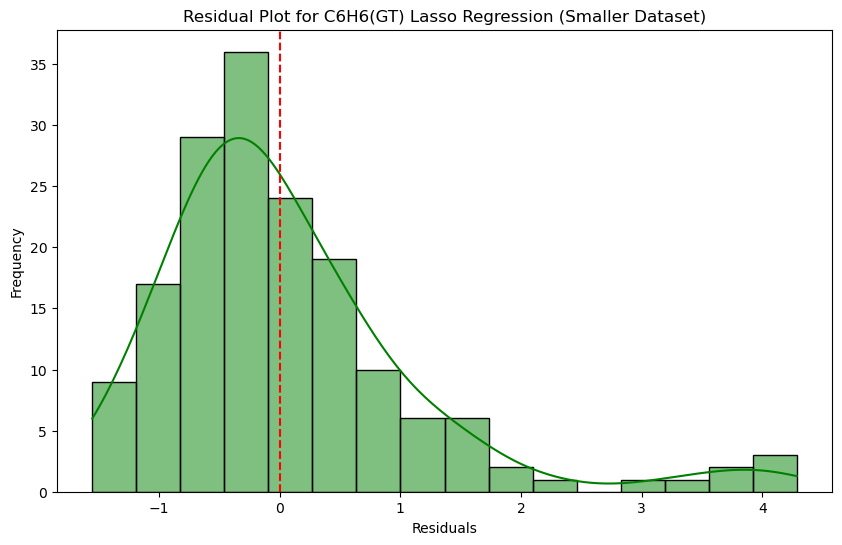

In [112]:
# Residual Plot
residuals2 = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals2, kde=True, color='green')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot for C6H6(GT) Lasso Regression (Smaller Dataset)')
plt.show()

The dataset likely involves predicting benzene (C6H6) concentration in the air using environmental factors. A smaller subset was analyzed with Lasso regression, suggesting multiple predictors and feature selection. The model performed well **(R² = 0.9804)**, explaining 98.04% of the variance. The residual plot indicates a good fit, though a right-skew suggests underestimation of higher benzene values. The **root mean squared error (RMSE) of 1.0795** for the Lasso regression model indicates moderate prediction errors. In contrast, the random forest regression model shows a significantly lower RMSE of 0.1892, suggesting a much better fit. This performance surpasses that of the linear regression model, which has an RMSE of 0.7839. This suggests that the random forest model handles nonlinear patterns and feature interactions more effectively than both the Lasso and linear regression models. The root mean squared error (RMSE) for the time series regression model is **16.44**, compared to **54.13** for the linear regression model. This represents a significant improvement, indicating that the time series regression model is a better option for determining accuracy and reliability.

#### Looking at **NO2(GT)(9357 Samples)** – Concentration of nitrogen dioxide (NO2) in the air (µg/m³)

In [115]:
# Target variable and x variables
X = AirQuality[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'C6H6(GT)']]
y = AirQuality['NO2(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rsme_lasso = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results for NO2(GT):")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rsme_lasso:.4f}")
print(f"R-squared: {r2:.4f}")

Lasso Regression Results for NO2(GT):
Mean Squared Error: 2927.9933
Root Mean Squared Error: 54.1109
R-squared: 0.8101


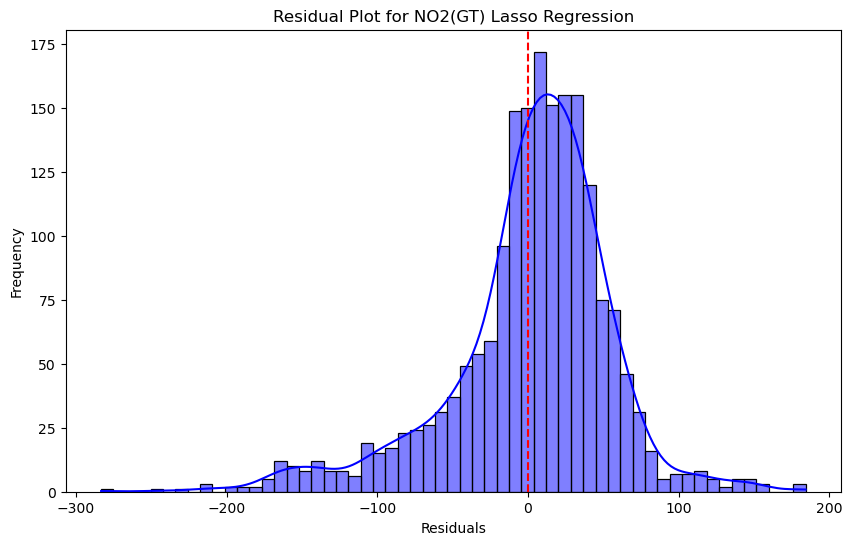

In [116]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot for NO2(GT) Lasso Regression')
plt.show()

The Lasso Regression model exhibits strong predictive performance, achieving an **R² value of 0.8101**. This indicates that the model explains 81% of the variance in NO₂(GT). The **Mean Squared Error (MSE) is 2927.9933**, and the **Root Mean Squared Error (RMSE) is 54.1109**, suggesting moderate prediction errors. The residual plot shows a roughly normal distribution centered around zero, although there is slight skewness. This suggests that, while the model effectively captures trends, some systematic error may still be present. To improve the model further, it would be beneficial to check for heteroscedasticity, compare it with other models, and analyze the impact of feature selection due to Lasso’s coefficient shrinkage. In comparison, the RMSE for the time series regression model is 16.44, while the RMSE for the linear regression model is 54.13. This significant difference indicates that the time series regression model is a better option for achieving accuracy and reliability.

#### Looking at **NO2(GT)(827 Samples)** – Concentration of nitrogen dioxide (NO2) in the air (µg/m³)

In [119]:
# Target variable and x variables
X = AirQuality2[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'DayOfWeek', 'Month', 'Year', 'CO(GT)', 'C6H6(GT)']]
y = AirQuality2['NO2(GT)']

# Split the data train 80% and test 20%. Random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rsme_lasso = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results for NO2(GT) (Smaller Dataset):")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rsme_lasso:.4f}")
print(f"R-squared: {r2:.4f}")

Lasso Regression Results for NO2(GT) (Smaller Dataset):
Mean Squared Error: 162.4003
Root Mean Squared Error: 12.7436
R-squared: 0.8497


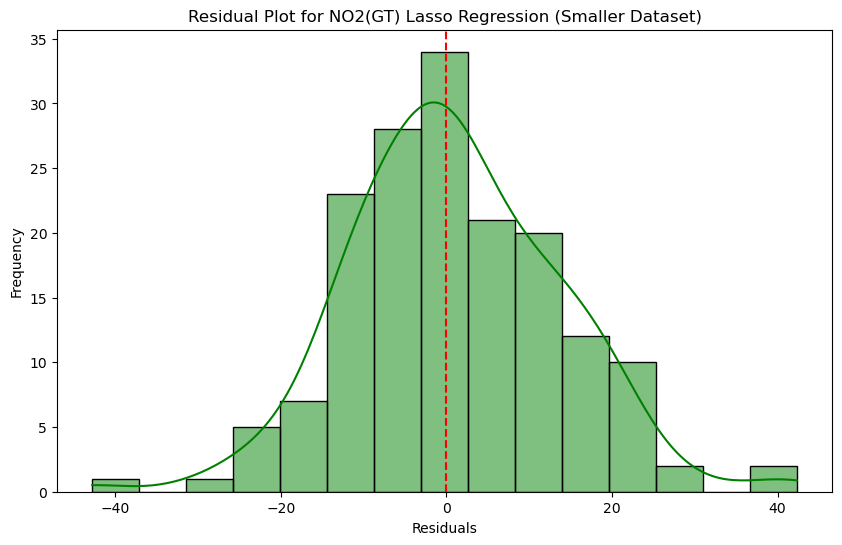

In [120]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot for NO2(GT) Lasso Regression (Smaller Dataset)')
plt.show()

The Lasso Regression model applied to the smaller dataset achieved an **R² value of 0.8497**, indicating that 84.97% of the variance in NO₂(GT) is explained by the model. The **Mean Squared Error (MSE) is 162.4003**, and the **Root Mean Squared Error (RMSE) is 12.7436**, which suggest lower overall prediction errors compared to the larger dataset. The residual plot shows a distribution centered around zero, although there is slight skewness and some outliers. The smaller dataset may contribute to increased variance in the predictions. To improve the model’s performance, further tuning of the regularization parameters or exploration of alternative regression techniques could be beneficial. For comparison, the RMSE for the Lasso Regression model is 12.7436, while the linear regression model has an RMSE of 12.79. The slight difference between the two suggests that it may be worthwhile to explore other alternatives to enhance accuracy. Overall, the data indicates that Random Forest regression might be a better choice.

# **Impact Section**

The focus of this project is on air pollution, which is recognized as one of the world's largest health and environmental problems, as previously mentioned in the "Introduce the Problem and Dataset" analysis. Air pollution is a significant contributor to climate change due to the release of greenhouse gases. It impacts not only the environment but also human health, as both outdoor and indoor air pollution can lead to high mortality rates and the development of various illnesses related to poor air quality. Current policies aimed at reducing air pollution are being rolled back, which could hinder efforts to save the lives of nearly 200,000 people in the coming years. Additionally, cuts to policies addressing climate change exacerbate the situation. The impact of air pollution on health—previously highlighted—reinforces the importance of this research. Although the dataset and questions primarily focus on outdoor air quality, it remains vital to understand airborne transmission and its effects on public health. While this dataset may not answer all the questions related to air quality, particularly when considering older data, it still provides valuable insights into current effects and the alignment of various factors. It's essential to recognize that the impacts of air pollution can differ, making research and education on air quality and climate change crucial.

# **Conclusion**

After conducting the research, it was found that the random forest regression model best predicted air pollutant levels. This model was more accurate than both linear and lasso regression models. Its success likely stems from its ability to understand complex relationships between different factors. The lasso regression model had moderate success (R² = 0.5173 for CO) but encountered issues with residuals, which indicated uneven variance.

Among the analyzed factors, PTO8 (NMHC) emerged as the strongest predictor of pollutant levels, featuring a score of 0.42 in feature importance. This suggests it plays a key role in predicting pollutant concentrations. Meteorological factors, such as humidity and temperature, also influenced the results, but their impact was less significant than that of sensor readings.

The analysis demonstrated that varying weather conditions affect peak air pollutant levels. Specifically, high humidity and low wind speeds were linked to increased pollutant concentrations. This finding aligns with earlier studies indicating that pollutants accumulate in still air, leading to poorer air quality.

Additionally, it was observed that using larger datasets improved the performance of the regression models. The Root Mean Squared Error (RMSE) decreased from 54.13 in a basic model to 12.78 after refining the data and selecting features. This underscores the importance of data quality and size in enhancing model predictions.

Ultimately, dataset size and feature selection are significant in balancing overfitting and underfitting in regression modeling. To improve performance, attention was focused on feature selection and preprocessing. By removing invalid data (such as measurements below -200), choosing the most relevant factors, and adjusting hyperparameters, a good balance between overfitting and underfitting was achieved. The findings demonstrate that excluding irrelevant or noisy features greatly enhances the model's reliability.

In conclusion, the key takeaways include the importance of data preprocessing and feature selection, especially when influential variables are present. Random Forest models have a greater ability to handle complex relationships and often provide more reliable results. Additionally, larger datasets typically lead to better outcomes, as training on more data reduces error rates and improves accuracy. However, other regression models can still be applied to achieve even more precise results.

# **References**

Beers, B. (2024, July 31). Regression: Definition, analysis, calculation, and example. Investopedia. https://www.investopedia.com/terms/r/regression.asp 

Fosterr, S. (2024, October 29). NOTEBOOKCD678447D7. Kaggle. https://www.kaggle.com/code/shawnfosterr/notebookcd678447d7 

GeeksforGeeks. (2024, May 15). What is lasso regression?. GeeksforGeeks. https://www.geeksforgeeks.org/what-is-lasso-regression/

Google. (2024). Gemini (version X) [Large language model]. Google AI. https://ai.google.com/gemini **(The purpose is to make code more understandable and to enhance the aesthetic appeal of graphs.)**

Institute for Health Metrics and Evaluation (IHME). (2024). High blood pressure [Dataset]. Global Burden of Disease – Risk Factors. Our World in Data (Minor processing).

Institute for Health Metrics and Evaluation (IHME). (2024). Outdoor ozone pollution [Dataset]. Global Burden of Disease – Risk Factors. Our World in Data (Minor processing).

Karbhari, V. (2020, February 26). How to evaluate regression models?. Medium. https://medium.com/acing-ai/how-to-evaluate-regression-models-d183b4f5853d 

OpenAI. (2023). ChatGPT (Mar 14 version) [Large language model]. https://chat.openai.com/chat​ **(Used to review grammar mistakes, revise code, provide a deeper analysis of the data, and explain errors in the code.)**

Random Forest regression in python. GeeksforGeeks. (2025, February 3). https://www.geeksforgeeks.org/random-forest-regression-in-python/ 

Ritchie, H., & Roser, M. (2021, January 1). Air Pollution. Our World in Data. https://ourworldindata.org/air-pollution

Time series regression models. Models - MATLAB & Simulink. (n.d.). https://www.mathworks.com/discovery/time-series-regression.html 

Topuz, B. (2024, November 8). UCI Air Quality Eda. Kaggle. https://www.kaggle.com/code/berkertopuz/uci-air-quality-eda 

# **Code**

This notebook showcases the implemented code.